# Explore HOTS

In [1]:
library(tidyverse)
library(GGally)
library(reshape2)
library(ggdark)

Warning message:
"package 'tidyverse' was built under R version 4.1.2"
-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.3.1 --

v ggplot2 3.3.6     v purrr   0.3.4
v tibble  3.1.7     v dplyr   1.0.9
v tidyr   1.2.0     v stringr 1.4.0
v readr   2.1.2     v forcats 0.5.1

Warning message:
"package 'ggplot2' was built under R version 4.1.3"
Warning message:
"package 'tibble' was built under R version 4.1.3"
Warning message:
"package 'tidyr' was built under R version 4.1.3"
Warning message:
"package 'readr' was built under R version 4.1.3"
Warning message:
"package 'dplyr' was built under R version 4.1.3"
-- Conflicts ---------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()

Warning message:
"package 'GGally' was built under R version 4.1.2"
Registered S3 method overwritten by 'GGally':
  method fr

In [2]:
all_data = read.csv("..\\data\\parsed\\ideal-variables-2022.csv")

In [3]:
sum(complete.cases(all_data))

[1] 2050

In [4]:
names(all_data)

[1] "X"     "crn"   "stn"   "cast"  "press" "theta" "sigma" "temp"  "csal" 
[10] "coxy"  "dic"   "ph"    "alk"   "phos"  "nit"   "sil"   "doc"

In [5]:
data = select(all_data, -X, -crn, -cast)

Make some single distributions of the data

Inverted geom defaults of fill and color/colour.
To change them back, use invert_geom_defaults().

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



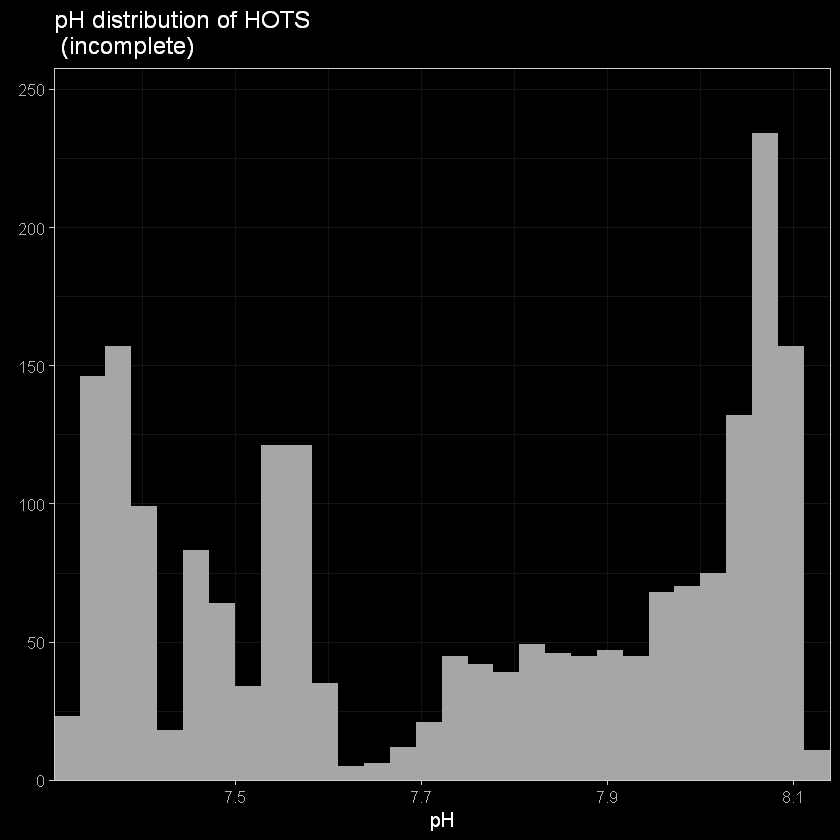

In [6]:
p <- ggplot(data) + 
        geom_histogram(aes(x = ph)) +
        labs(x = 'pH', y = element_blank(), title = "pH distribution of HOTS \n (incomplete)") + 
        scale_x_continuous(expand = c(0,0)) +
        scale_y_continuous(expand = c(0,0,0.1,0)) + 
        dark_theme_bw(base_size = 12) 
p
#ggsave("pH_dist.svg", p, width = 89, height = 89, units = "mm")

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



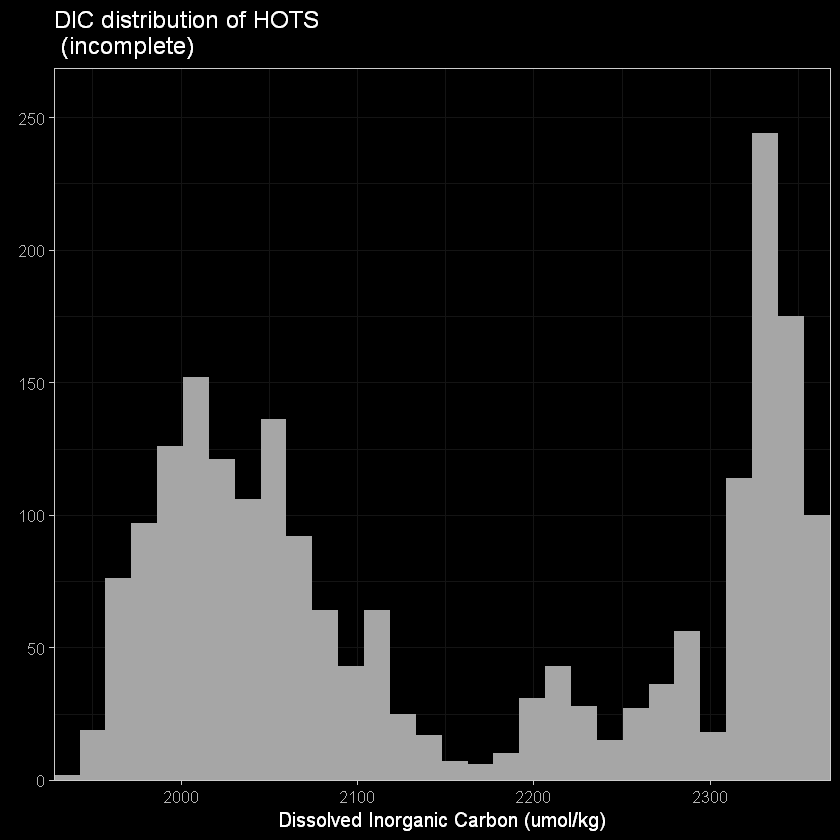

In [7]:
p <- ggplot(data) + 
        geom_histogram(aes(x = dic)) +
        labs(x = 'Dissolved Inorganic Carbon (umol/kg)', 
             y = element_blank(), 
             title = "DIC distribution of HOTS \n (incomplete)") + 
        scale_x_continuous(expand = c(0,0)) +
        scale_y_continuous(expand = c(0,0,0.1,0)) + 
        dark_theme_bw(base_size = 12) 
p
#ggsave("dic_dist.svg", p, width = 89, height = 89, units = "mm")

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



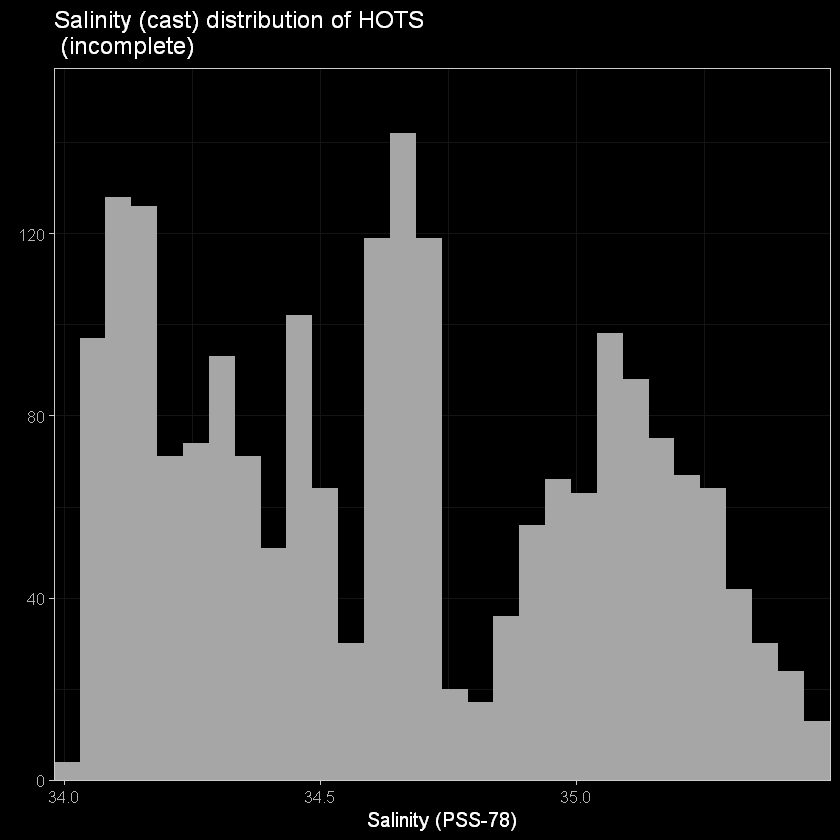

In [8]:
p <- ggplot(data) + 
        geom_histogram(aes(x = csal)) +
        labs(x = 'Salinity (PSS-78)', 
             y = element_blank(), 
             title = "Salinity (cast) distribution of HOTS \n (incomplete)") + 
        scale_x_continuous(expand = c(0,0)) +
        scale_y_continuous(expand = c(0,0,0.1,0)) + 
        dark_theme_bw(base_size = 12) 
p
#ggsave("csal_dist.svg", p, width = 89, height = 89, units = "mm")

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



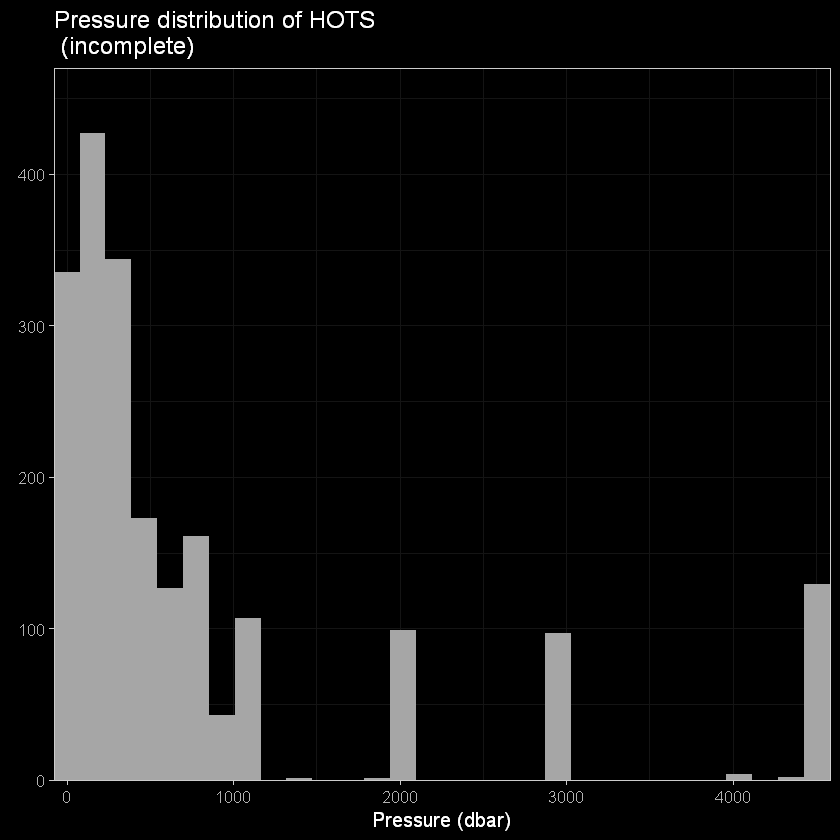

In [9]:
p <- ggplot(data) + 
        geom_histogram(aes(x = press)) +
        labs(x = 'Pressure (dbar)', 
             y = element_blank(), 
             title = "Pressure distribution of HOTS \n (incomplete)") + 
        scale_x_continuous(expand = c(0,0)) +
        scale_y_continuous(expand = c(0,0,0.1,0)) + 
        dark_theme_bw(base_size = 12) 
p
#ggsave("press_dist.svg", p, width = 89, height = 89, units = "mm")

Plot a few things of interest against each other

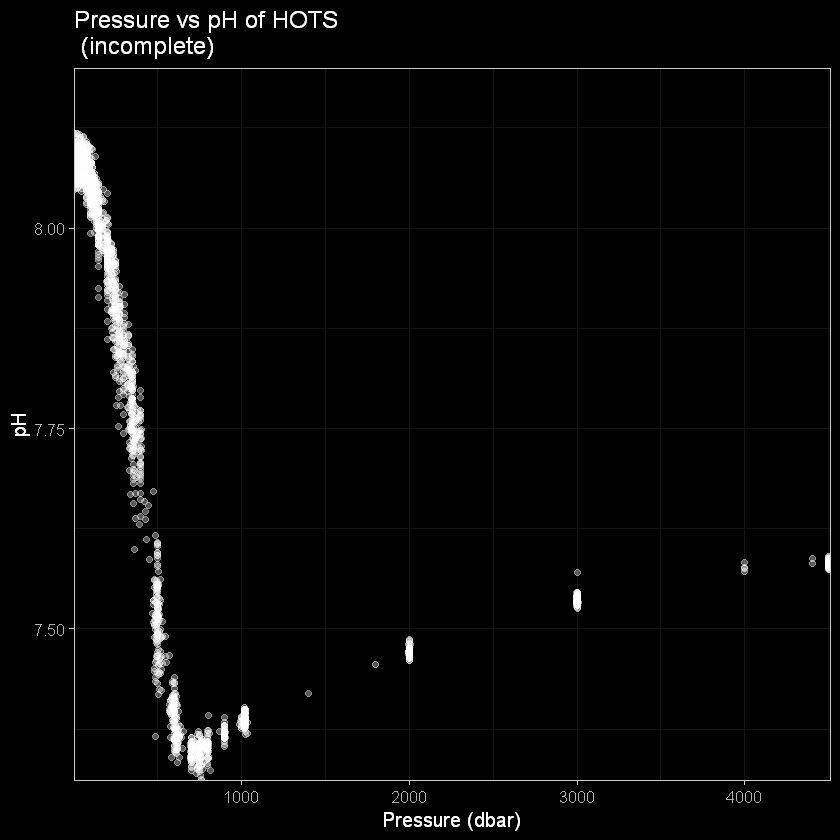

In [10]:
p <- ggplot(data) + 
        geom_point(aes(x = press, y = ph), alpha = 0.35) +
        labs(x = 'Pressure (dbar)', 
             y = 'pH', 
             title = "Pressure vs pH of HOTS \n (incomplete)") + 
        scale_x_continuous(expand = c(0, 0.1)) +
        scale_y_continuous(expand = c(0,0,0.1,0)) + 
        dark_theme_bw(base_size = 12) 
p
# ggsave("press_ph.svg", p, width = 89, height = 89, units = "mm")

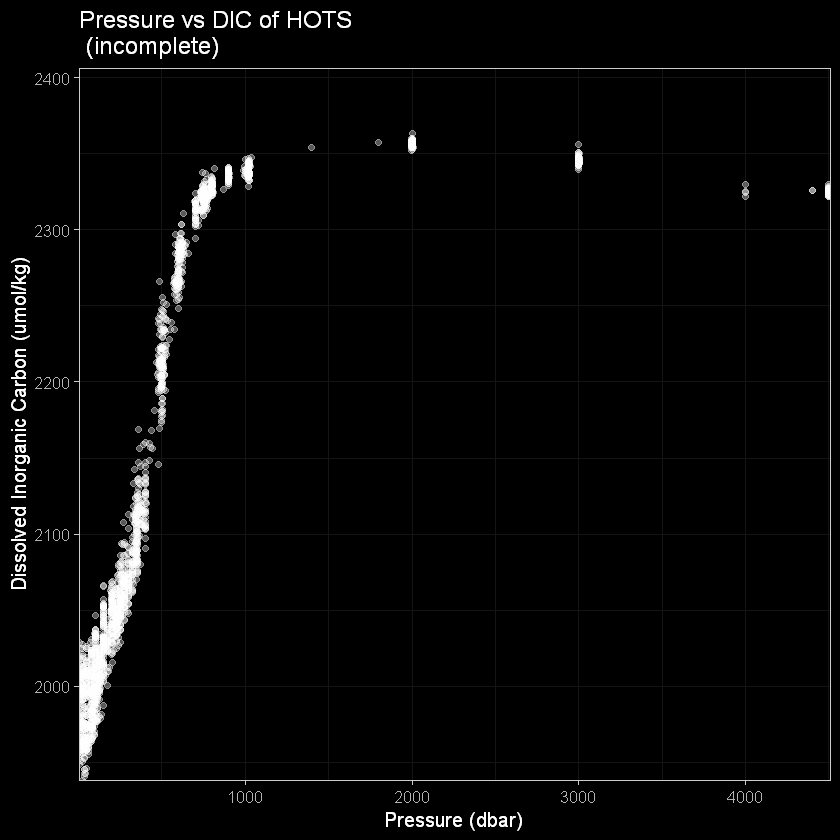

In [11]:
p <- ggplot(data) + 
        geom_point(aes(x = press, y = dic), alpha = 0.35) +
        labs(x = 'Pressure (dbar)', 
             y = 'Dissolved Inorganic Carbon (umol/kg)', 
             title = "Pressure vs DIC of HOTS \n (incomplete)") + 
        scale_x_continuous(expand = c(0, 0.1)) +
        scale_y_continuous(expand = c(0,0,0.1,0)) + 
        dark_theme_bw(base_size = 12) 
p
# ggsave("press_dic.svg", p, width = 89, height = 89, units = "mm")

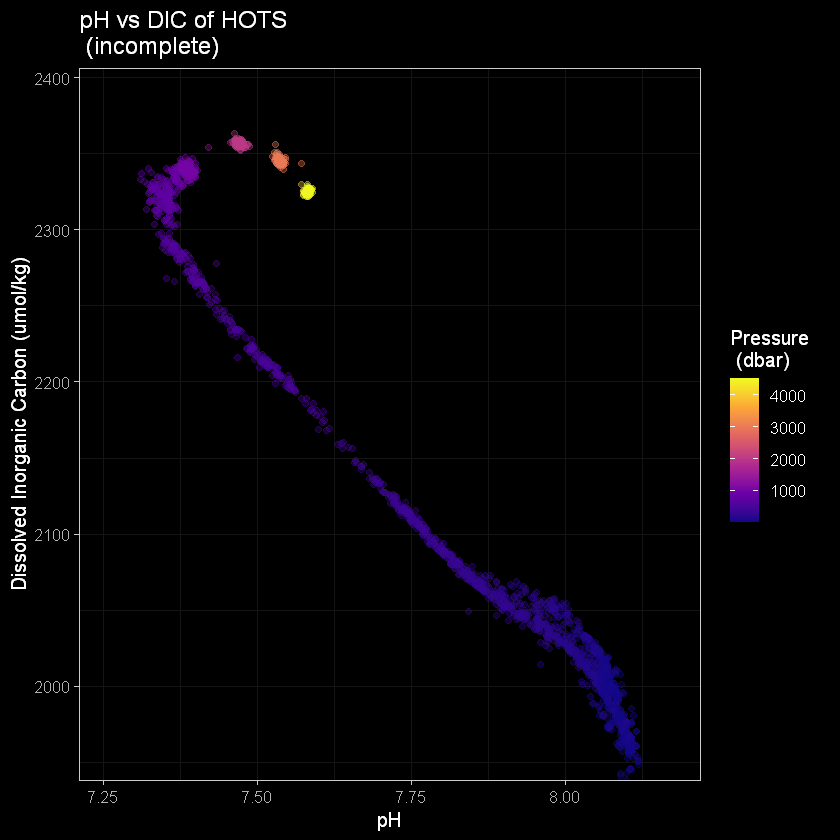

In [12]:
p <- ggplot(data) + 
        geom_point(aes(x = ph, y = dic, color = press), alpha = 0.35) +
        labs(x = 'pH', 
             y = 'Dissolved Inorganic Carbon (umol/kg)', 
             title = "pH vs DIC of HOTS \n (incomplete)",
             color = "Pressure \n (dbar)") + 
        scale_x_continuous(expand = c(0, 0.1)) +
        scale_y_continuous(expand = c(0,0,0.1,0)) + 
        scale_color_viridis_c(option = "plasma") + 
        dark_theme_bw(base_size = 12) 
p
#ggsave("pH_dic_press.svg", p, width = 89*1.33, height = 89, units = "mm")

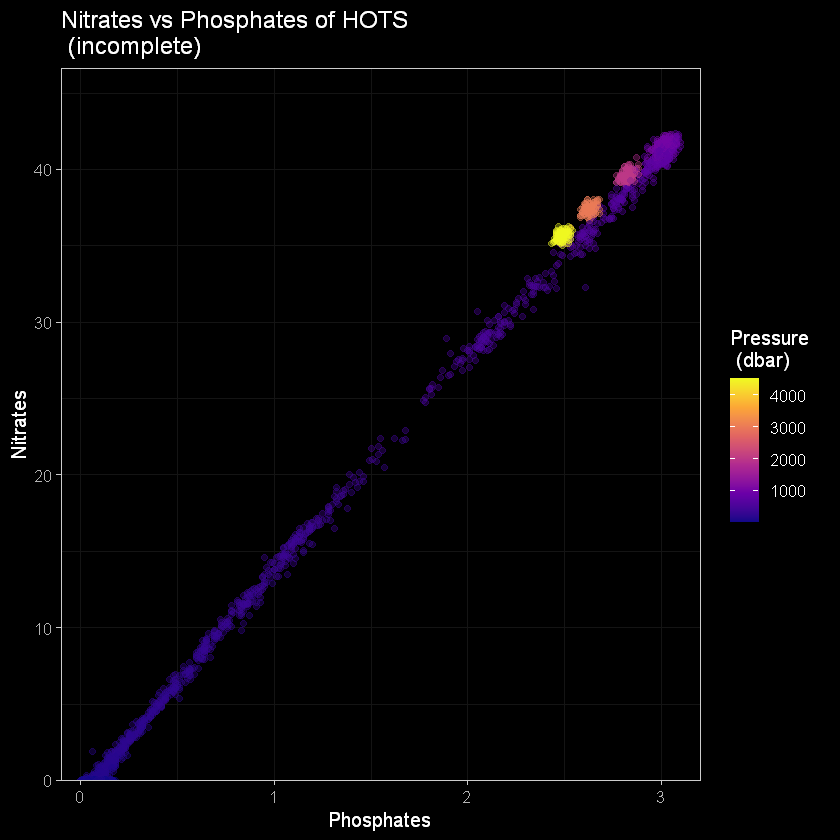

In [13]:
p <- ggplot(data) + 
        geom_point(aes(x = phos, y = nit, color = press), alpha = 0.35) +
        labs(x = 'Phosphates', 
             y = 'Nitrates', 
             title = "Nitrates vs Phosphates of HOTS \n (incomplete)",
             color = "Pressure \n (dbar)") + 
        scale_x_continuous(expand = c(0, 0.1)) +
        scale_y_continuous(expand = c(0,0,0.1,0)) + 
        scale_color_viridis_c(option = "plasma") + 
        dark_theme_bw(base_size = 12) 
p
#ggsave("pH_dic_press.svg", p, width = 89*1.33, height = 89, units = "mm")

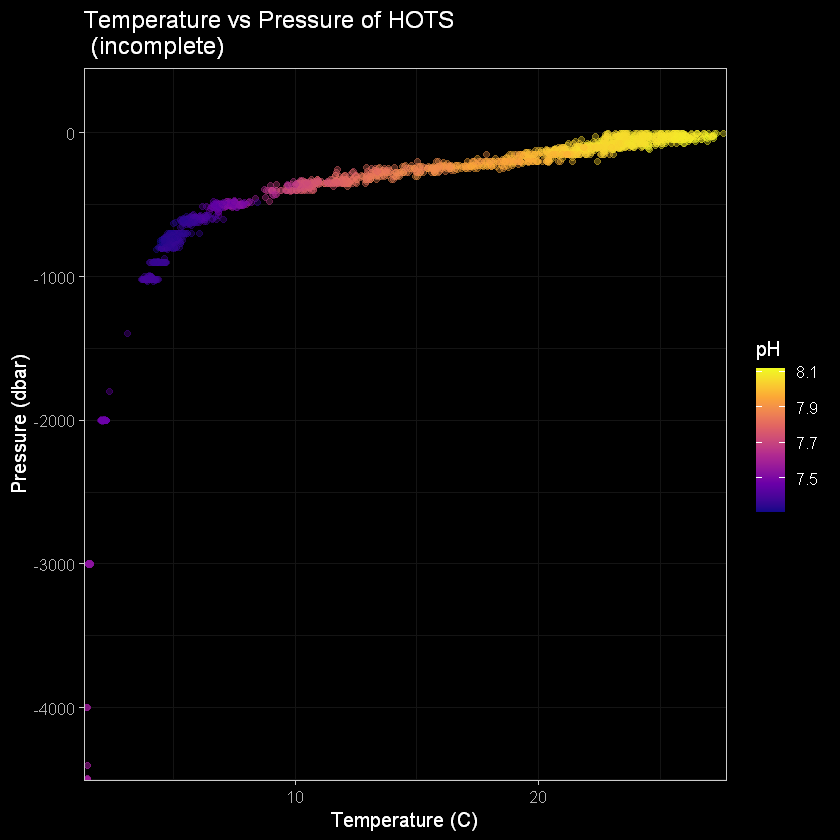

In [14]:
p <- ggplot(data) + 
        geom_point(aes(x = temp, y = -press, color = ph), alpha = 0.35) +
        labs(x = 'Temperature (C)', 
             y = 'Pressure (dbar)', 
             title = "Temperature vs Pressure of HOTS \n (incomplete)",
             color = "pH") + 
        scale_x_continuous(expand = c(0, 0.1)) +
        scale_y_continuous(expand = c(0,0,0.1,0)) + 
        scale_color_viridis_c(option = "plasma") + 
        dark_theme_bw(base_size = 12) 
p
#ggsave("pH_dic_press.svg", p, width = 89*1.33, height = 89, units = "mm")

Check global Correlations 

In [15]:
cors <- round(cor(data, use="pairwise.complete.obs"),3)
# Get lower triangle of the correlation matrix
get_lower_tri<-function(cormat){
cormat[upper.tri(cormat)] <- NA
return(cormat)
}
# Get upper triangle of the correlation matrix
get_upper_tri <- function(cormat){
cormat[lower.tri(cormat)]<- NA
return(cormat)
}
upper_tri <- get_upper_tri(cors)
melted_cormat <- melt(upper_tri, na.rm = TRUE)

Warning message in cor(data, use = "pairwise.complete.obs"):
"the standard deviation is zero"


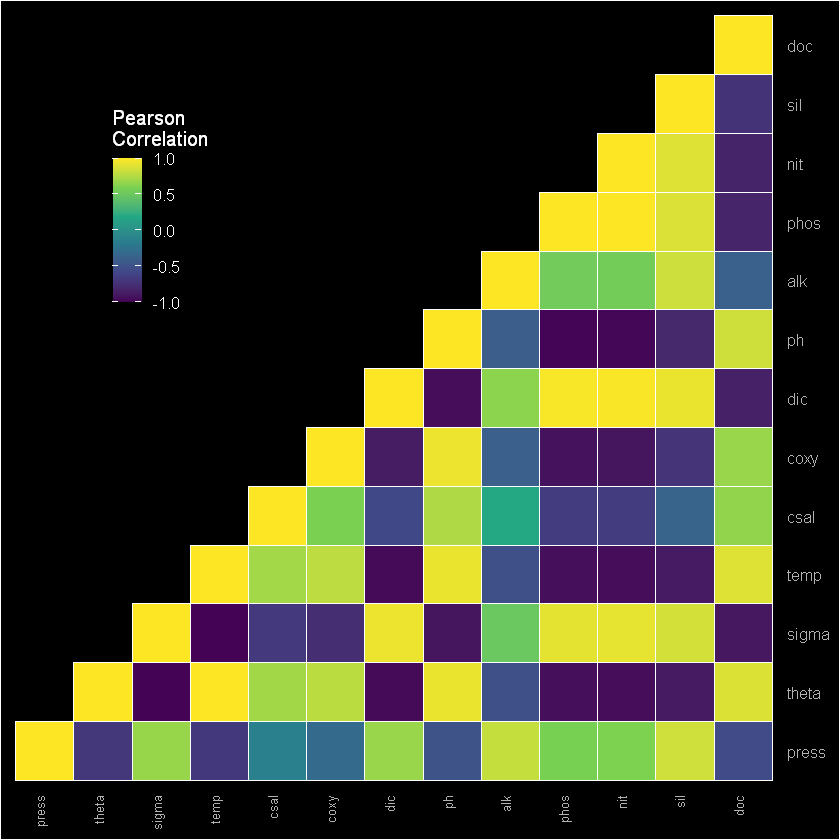

In [17]:
p <- ggplot(melted_cormat, aes(Var2, Var1, fill = value))+
        geom_tile(color = "white")+
        scale_fill_viridis_c(limit = c(-1,1),
                             name="Pearson\nCorrelation") +
        dark_theme_minimal(base_size = 12) + 
        theme(axis.text.x = element_text(angle = 90,
                                         vjust = 0, 
                                         size = 8,
                                         hjust = 1),
             axis.title.x=element_blank(),
             axis.title.y =element_blank(),
             panel.grid.major = element_blank(),
             panel.grid.minor = element_blank()) + 
        scale_y_discrete(position = "right") +
        theme(legend.position = c(0.2, 0.75))
    
p
#ggsave("HOTS_CorMatrix.svg",p, width = 89, height =89, units = "mm")